# Upper Confidence Bound (UCB)

## Importing the libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [30]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')

In [31]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## Implementing UCB

In [42]:
import math
N= 10000 # number of rows to analyse
d=10  # number of columns /ads
ads_selected=[] # list to store selected ads
numbers_of_selections=[0]*d  # d sized array for storing how much each of d ads was selected
sums_of_rewards=[0]*d # d sized array for storing how much reward did get each of d ads
total_reward=0  # sum of all rewards

for n in range(0,N):
  ad=0 # start from the first ad
  max_ucb=0 # max value to compare with upper bound
  for m in range(0,d): # start iterating through columns / ads
    if numbers_of_selections[m]>0:  # we cannot divide by 0, if it is more than zero convey computations
      average_reward=sums_of_rewards[m]/numbers_of_selections[m] # calculate average reward for given m ad
      delta_i=math.sqrt(3/2 *math.log(n+1)/numbers_of_selections[m]) # calculate delta value 
      upper_bound=average_reward+delta_i # upper bound is a sum of average reward and delta
    else:
      upper_bound=1e400 # if this ad was not selected before, take large number for upper bound
    
    if (upper_bound>max_ucb): # compare upper bound, if needed update max value
        max_ucb=upper_bound
        ad=m  # save ad index of the ad with max upper confidence bound
  ads_selected.append(ad) # append found ad index to list of selected ads
  numbers_of_selections[ad]+=1 # increment the number of selections
  reward=dataset.values[n,ad] # find the reward (1 or 0) from dataset
  sums_of_rewards[ad]+=reward # increment reward for given ad
  total_reward+=reward # update total reward

## Visualising the results

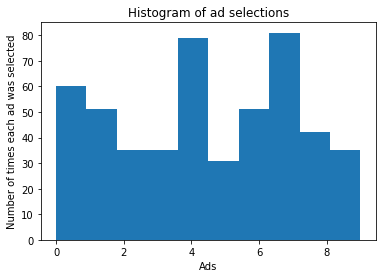

In [43]:
plt.hist(ads_selected) # list contains indexes of ads selected as maximum for all N rounds
plt.title('Histogram of ad selections')
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()